In [1]:
import pandas as pan;
import numpy as np;
import matplotlib.pyplot as plotter;
import seaborn as sns;

In [11]:
def create_age_rand_distr(mean = 50, sd = 13, size = 100, seed = 42):
    np.random.seed(seed)
    sample_ages = np.random.normal(loc = mean, scale = sd, size = size)
    sample_ages = np.round(sample_ages, decimals=0)
    return sample_ages

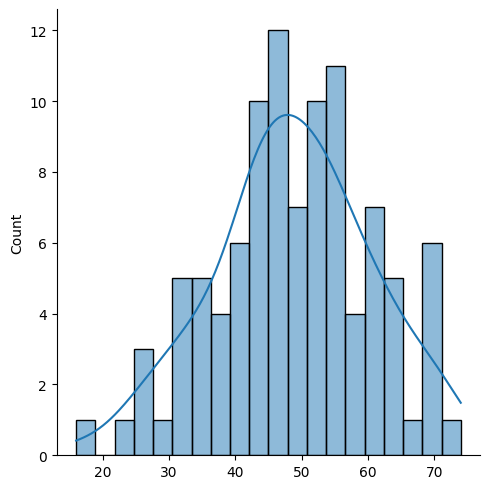

In [12]:
sns.displot(create_age_rand_distr(), kde= True, bins = 20)

<Axes: >

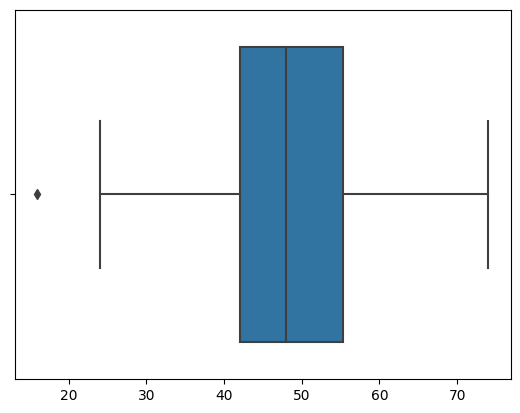

In [13]:
sns.boxplot(x = create_age_rand_distr())

In [14]:
series = pan.Series(create_age_rand_distr())
series.describe()

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

In [15]:
iqr = 55.25 - 42
lower_lim = 42 - 1.5*iqr

In [16]:
lower_lim

22.125

In [19]:
low_outl = series[series < lower_lim]
low_outl

74    16.0
dtype: float64

In [21]:
#can also use this to find the iqr
(q75, q25) = np.quantile(create_age_rand_distr(), [0.75, 0.25])
iqr = q75 - q25

In [22]:
iqr

13.25

In [23]:
#intro to the dataset
matrix_data = pan.read_csv("Ames_Housing_Data.csv")

In [28]:
matrix_data.corr(numeric_only=True)["SalePrice"].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

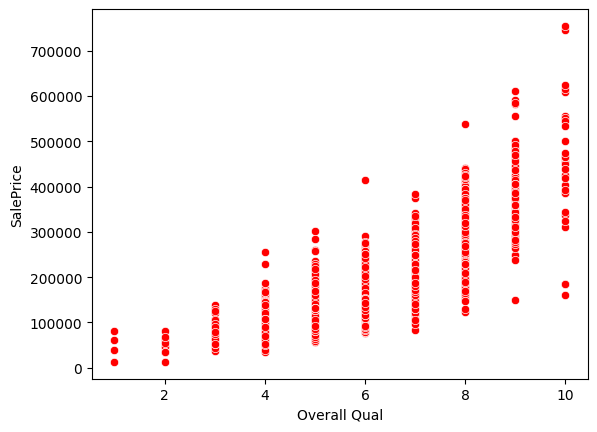

In [31]:
sns.scatterplot(y = matrix_data["SalePrice"], x = matrix_data["Overall Qual"], color = "red")

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

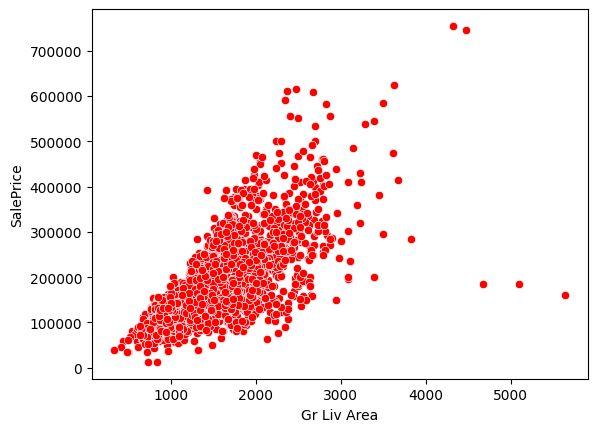

In [32]:
sns.scatterplot(x = matrix_data["Gr Liv Area"], y = matrix_data["SalePrice"], color = "red")

In [36]:
matrix_data.drop(matrix_data[(matrix_data["Gr Liv Area"] > 4000) & (matrix_data["SalePrice"] < 400000)].index, axis = 0, inplace= True)

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

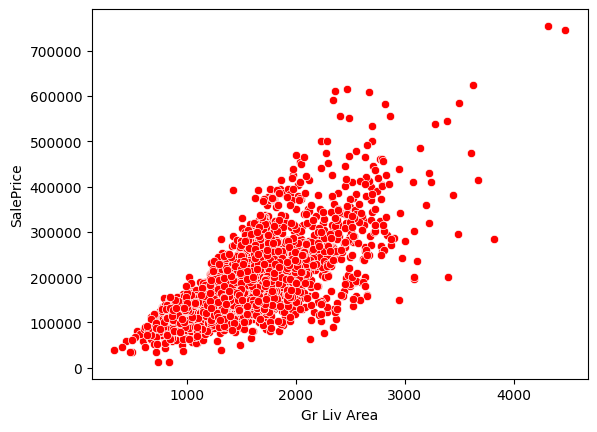

In [37]:
sns.scatterplot(x = matrix_data["Gr Liv Area"], y = matrix_data["SalePrice"], color = "red")

In [39]:
matrix_data.to_csv("WithoutWeirdOutliers_Ames_Housing_Data.csv")